In [12]:
%pwd


'C:\\Users\\Eeshan'

In [4]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style = "white")
%matplotlib inline

In [3]:
df = pd.read_csv(r"C:\Users\Eeshan\Desktop\CSE\DSC_TP\Data\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Few intuitive thoughts:
It appears that tenure, monthly and Total charges are the most significant parameters.
Second tier parameters could be Partner,Dependants; finally, parameters could be the types of services availed, and then,Senior Citizen status.


In [25]:
df = df.fillna(0)
df['TotalCharges'] = df['TotalCharges'].replace(" ", 0).astype('float32')

In [10]:
churn_series = df['Churn'][df['Churn']=='Yes']
churn_num = len(churn_series)
perc_churn = (float(churn_num)/len(df.index))*100
perc_not = 100-perc_churn
print("churned percentage is",perc_churn)

churned percentage is 26.536987079369588


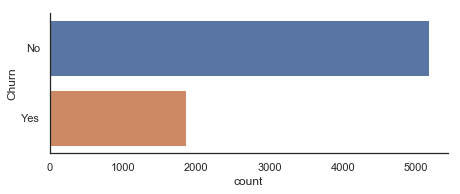

In [11]:
ax = sns.catplot(y="Churn", kind="count", data=df, height=2.6, aspect=2.5,)

In [23]:
'''sum = 0
avg = 1
for i in df.index:
    sum+= df.ix[[i],['TotalCharges']]
    avg = sum/i
    j = df.ix[[i],['TotalCharges']]
    if(type(j)=='str'):
        df.ix[[i]['TotalCharges']] = avg'''

C:\Users\Eeshan\Anaconda3\envs\envname\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


TypeError: unsupported operand type(s) for +: 'int' and 'str'

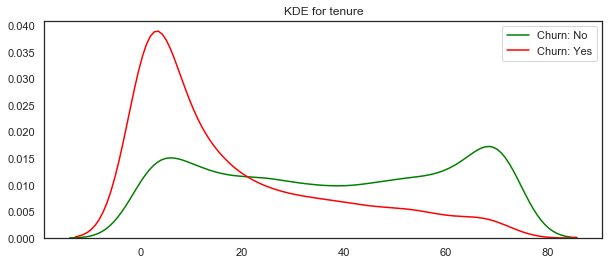

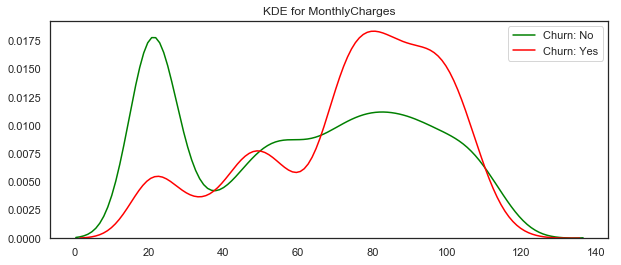

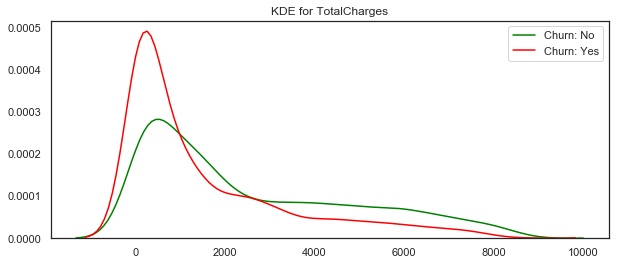

In [26]:
def kdeplot(param):
    plt.figure(figsize=(10, 4))
    plt.title("KDE for {}".format(param))
    ax0 = sns.kdeplot(df[param][df['Churn'] == 'No'], color= 'green', label= 'Churn: No')
    ax1 = sns.kdeplot(df[param][df['Churn'] == 'Yes'], color= 'red', label= 'Churn: Yes')
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

From the plots above we can conclude that:

1)Recent clients are more likely to churn\
2)Clients with higher MonthlyCharges are also more likely to churn\
3)Tenure and MonthlyCharges are probably important features
